<a href="https://colab.research.google.com/github/Alxsoa/Alexandre-Soares/blob/main/C%C3%B3pia_de_Aula_1_04_Exemplo_Banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado Supervisionado II - Turma 01

## Aula 1 - Parte 04: Exemplo - Banco

### Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

#### Google Classroom: `ip4s4w7`

"*In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.*"

https://www.kaggle.com/c/santander-customer-transaction-prediction/overview

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np

# DESCOMENTE PARA RODAR NO COLAB # from google.colab import files # Para fazer upload de arquivos pro Colab
# DESCOMENTE PARA RODAR NO COLAB # import io # Essenciamente uma biblioteca de comunicação com o sistema

In [ ]:
# DESCOMENTE PARA RODAR NO COLAB # uploaded = files.upload()

In [ ]:
# DESCOMENTE PARA RODAR NO COLAB # sms = pd.read_csv(io.BytesIO(uploaded['banco.csv']))

In [ ]:
banco = pd.read_csv('banco.csv')

### A base de dados

In [ ]:
banco.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
banco.drop(columns='ID_code')

In [ ]:
banco.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
banco['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

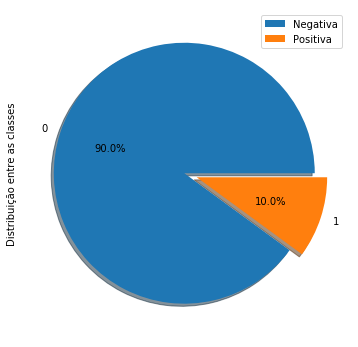

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

banco['target'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel('Distribuição entre as classes')
plt.legend(['Negativa', 'Positiva'])
plt.show()

### Classificador de Bayes ingênuo gaussiano

- 200 atributos
- 200.000 observações de cada


- Dados observados: $X$ matriz $200.000 \times 200$
- Cada linha: uma realização do vetor aleatório **contínuo** $\mathbf{X} \in \mathbb{R}^{200}$

- Variável resposta $Y \in \{0, 1\}$ - 200.000 observações


- $0 \iff$ transação não realizada
- $1 \iff$ transação realizada

- Como $\mathbf{X}$ é contínuo, temos que:


$$\mathbb{P}(Y = 1 | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = 1)\mathbb{P}(Y = 1)}{\sum_{c = 0}^{1} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = 1)\mathbb{P}(Y = 1)$$


$$\mathbb{P}(Y = 0 | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = 0)\mathbb{P}(Y = 0)}{\sum_{c = 0}^{1} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = 0)\mathbb{P}(Y = 0)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes


- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \{0, 1\}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes* ◄


- Na nossa linguagem: *sabendo sobre a realização ou não da transação, os 200 atributos de cada consumidor sãao independentes*

- Matematicamente: *para toda classe $d \in \{0, 1\}$, fatoramos* $$q(\mathbf{X} = \mathbf{x} | Y = d) = q(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} q(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$ ◄

$\Rightarrow$ Vamos verificar a validade das duas hipóteses indicadas!

### Análise exploratória

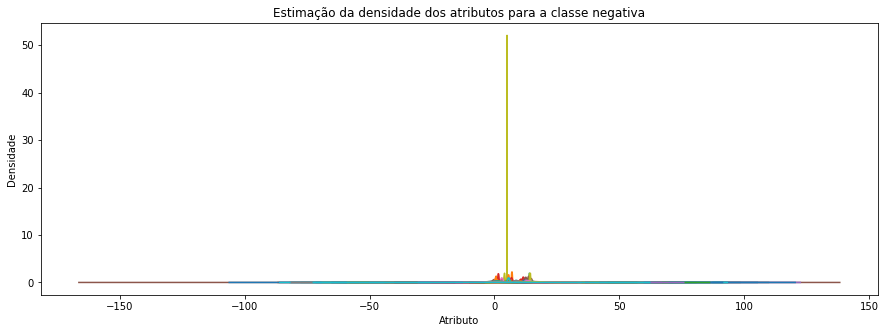

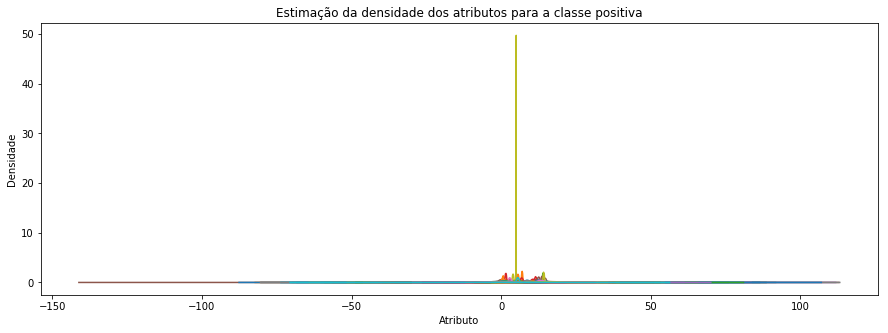

In [ ]:
banco[banco['target'] == 0].iloc[:, 2:].plot(kind = 'kde', ind = 25, legend = False, figsize = (15, 5))
plt.title('Estimação da densidade dos atributos para a classe negativa')
plt.xlabel('Atributo')
plt.ylabel('Densidade')
plt.show()

banco[banco['target'] == 1].iloc[:, 2:].plot(kind = 'kde', ind = 25, legend = False, figsize = (15, 5))
plt.title('Estimação da densidade dos atributos para a classe positiva')
plt.xlabel('Atributo')
plt.ylabel('Densidade')
plt.show()

In [ ]:
banco.iloc[:, 2:].head()

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

normalizador = StandardScaler()
normalizado = pd.DataFrame(normalizador.fit_transform(banco.iloc[:, 2:]))

# normalizado = pd.DataFrame(StandardScaler().fit_transform(banco.iloc[:, 2:]))

In [ ]:
normalizado.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375


In [ ]:
normalizado.columns = banco.columns[2:]
normalizado.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375


In [ ]:
# Queremos só o valor, não mais estruturas de DataFrame

resposta = banco['target'].values

In [ ]:
resposta

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

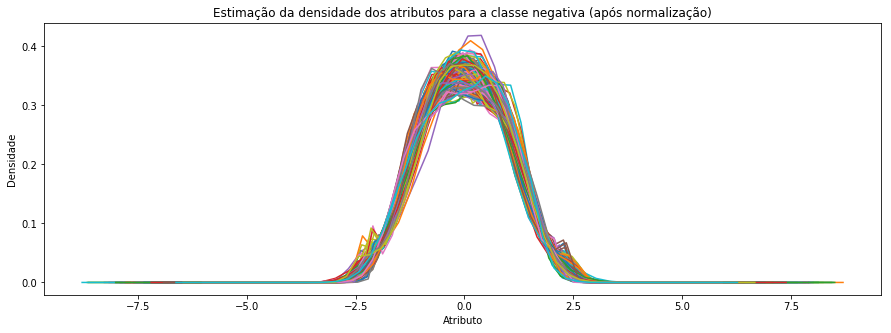

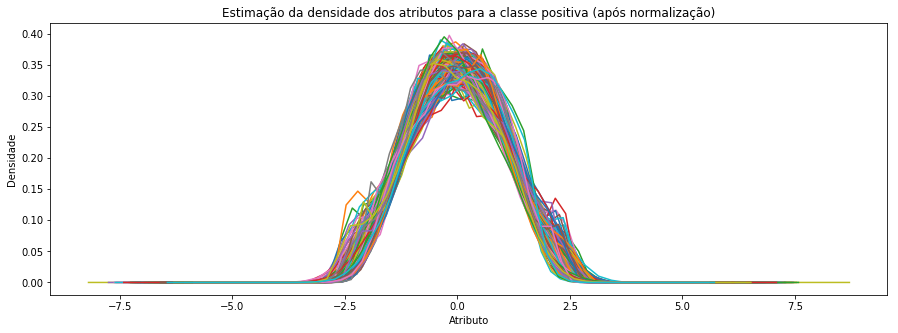

In [ ]:
normalizado[resposta == 0].plot(kind = 'kde', ind = 50, legend = False, figsize = (15, 5))
plt.title('Estimação da densidade dos atributos para a classe negativa (após normalização)')
plt.xlabel('Atributo')
plt.ylabel('Densidade')
plt.show()

normalizado[resposta == 1].plot(kind = 'kde', ind = 50, legend = False, figsize = (15, 5))
plt.title('Estimação da densidade dos atributos para a classe positiva (após normalização)')
plt.xlabel('Atributo')
plt.ylabel('Densidade')
plt.show()

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html
# https://en.wikipedia.org/wiki/Quantile_normalization

# transformador = QuantileTransformer(output_distribution = 'normal')
# norm_transf = pd.DataFrame(transformador.fit_transform(banco.iloc[:, 2:]))

norm_transf = pd.DataFrame(QuantileTransformer(output_distribution = 'normal').fit_transform(normalizado))

In [ ]:
norm_transf.head()

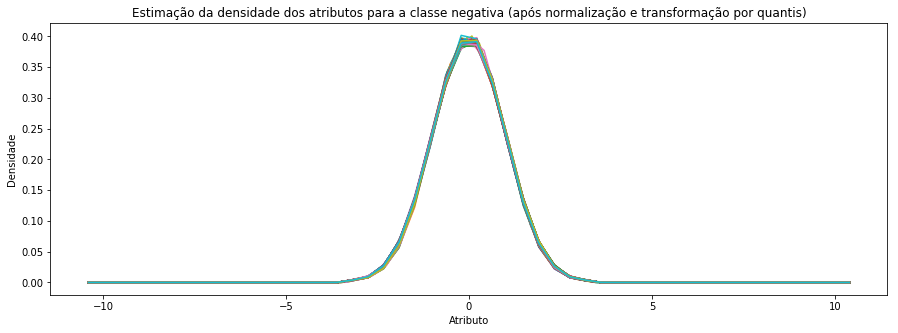

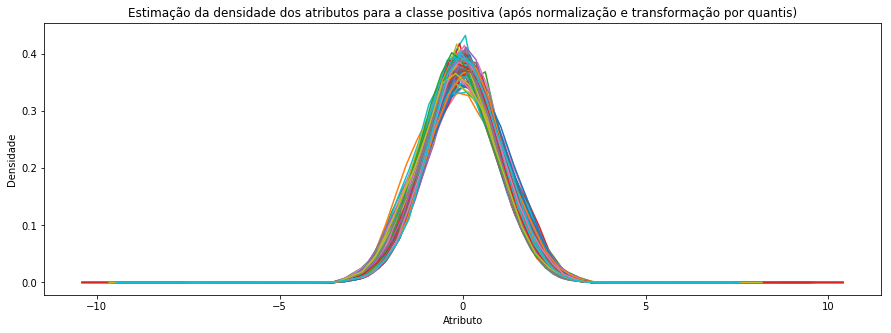

In [ ]:
norm_transf[resposta == 0].plot(kind = 'kde', ind = 50, legend = False, figsize = (15, 5))
plt.title('Estimação da densidade dos atributos para a classe negativa (após normalização e transformação por quantis)')
plt.xlabel('Atributo')
plt.ylabel('Densidade')
plt.show()

norm_transf[resposta == 1].plot(kind = 'kde', ind = 50, legend = False, figsize = (15, 5))
plt.title('Estimação da densidade dos atributos para a classe positiva (após normalização e transformação por quantis)')
plt.xlabel('Atributo')
plt.ylabel('Densidade')
plt.show()

- Os atributos parecem aproximadamente normais! E quanto à independência?

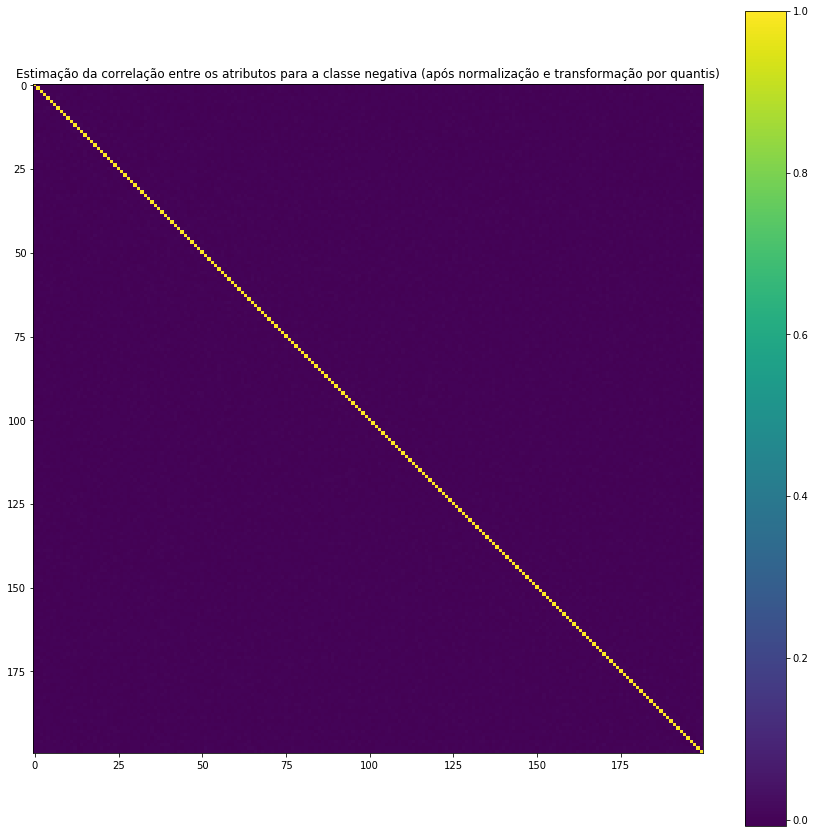

In [ ]:
plt.figure(figsize = (15, 15))
plt.imshow(norm_transf[resposta == 0].corr())
plt.colorbar()
plt.title('Estimação da correlação entre os atributos para a classe negativa (após normalização e transformação por quantis)')
plt.show()

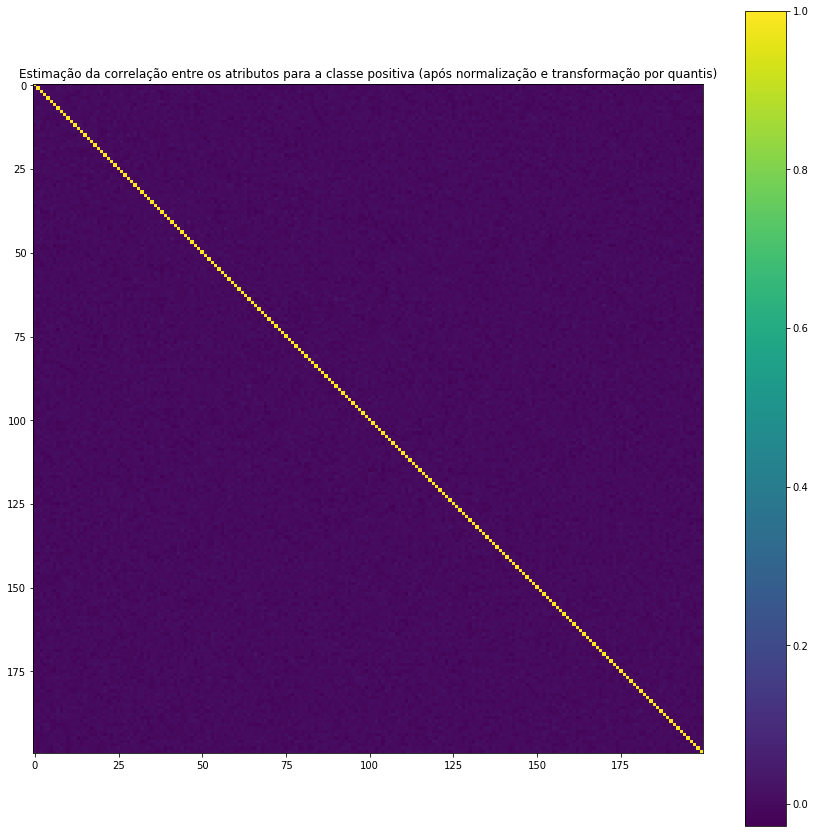

In [ ]:
plt.figure(figsize = (15, 15))
plt.imshow(norm_transf[resposta == 1].corr())
plt.colorbar()
plt.title('Estimação da correlação entre os atributos para a classe positiva (após normalização e transformação por quantis)')
plt.show()

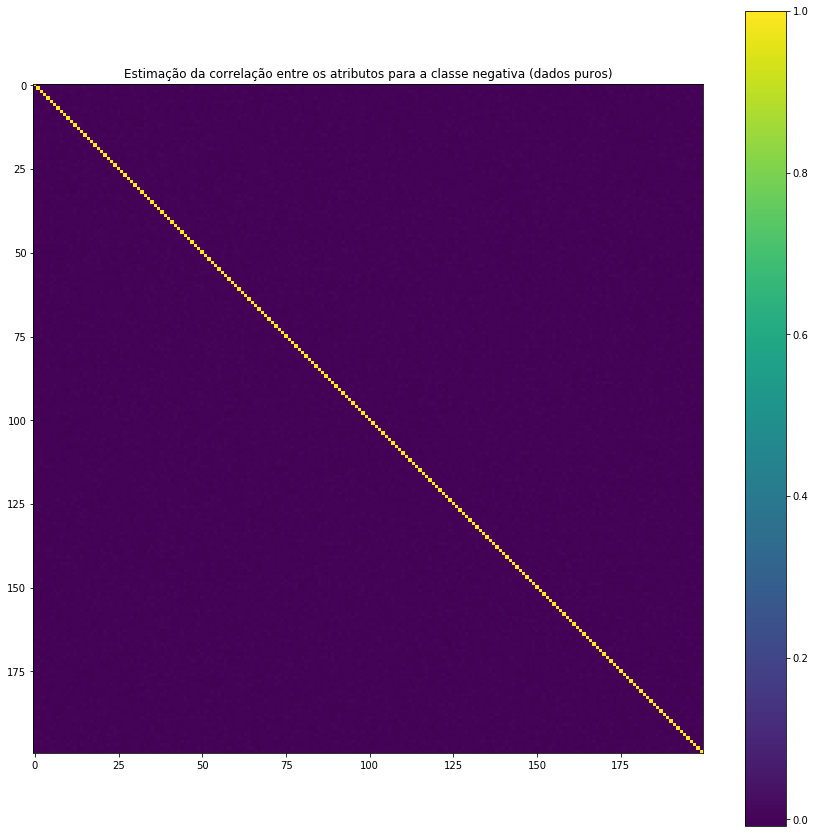

In [ ]:
plt.figure(figsize = (15, 15))
plt.imshow(banco[resposta == 0].iloc[:,2:].corr())
plt.colorbar()
plt.title('Estimação da correlação entre os atributos para a classe negativa (dados puros)')
plt.show()

### Treino-teste e classificação!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_transf, resposta, test_size = 0.33)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

NB_clf = GaussianNB()

In [ ]:
NB_clf.fit(X_train, y_train)

In [ ]:
NB_clf.epsilon_

In [ ]:
NB_clf.class_prior_

In [ ]:
y_test_pred = NB_clf.predict(X_test)

In [ ]:
print(1 - NB_clf.score(X_test, y_test))